# PROHI HT2024

## OCD Patient Dataset: Demographics & Clinical Data
Source of the data set: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

### Basic EDA

#### 1. Loading and formatting

a) Importing libraries and Load the dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pointbiserialr


In [2]:
df = pd.read_csv("ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15/07/2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28/04/2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02/02/2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25/08/2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20/02/2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


b) Check the total size of the dataset.

In [3]:
df.shape

(1500, 17)

In [4]:
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

### 2. Processing pipeline

a) Impute missing values

In [5]:
df.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

Preprocessing

In [6]:

# Handle Missing Values
df['Previous Diagnoses'].fillna('No Previous Diagnoses', inplace=True)
df['Medications'].fillna('No Medications', inplace=True)

# Drop columns which aren't needed
df.drop(columns=["OCD Diagnosis Date"], inplace=True)
df.drop(columns=["Patient ID"], inplace=True)

# Datatype
df['Depression Diagnosis'] = df['Depression Diagnosis'].map({'Yes': 1, 'No': 0})
df['Family History of OCD'] = df['Family History of OCD'].map({'Yes': 1, 'No': 0})
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# OneHotEncode
# Compulsion Type
compulsion_types = df['Compulsion Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_compulsion_types = ohe.fit_transform(df[['Compulsion Type']])
encoded_column_names = [f"Compulsion_Type_{compulsion_type}" for compulsion_type in compulsion_types]
encoded_df = pd.DataFrame(encoded_compulsion_types.toarray().astype(int), columns=encoded_column_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop('Compulsion Type', axis=1, inplace=True)

# Medications
medications = df['Medications'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_medications = ohe.fit_transform(df[['Medications']])
encoded_column_names = [f"Medications_{medication}" for medication in medications]
encoded_df = pd.DataFrame(encoded_medications.toarray().astype(int), columns=encoded_column_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop('Medications', axis=1, inplace=True)

# One-hot encoding for Ethnicity
ethnicities = df['Ethnicity'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_ethnicities = ohe.fit_transform(df[['Ethnicity']])
encoded_ethnicity_column_names = [f"Ethnicity_{ethnicity}" for ethnicity in ethnicities]
encoded_ethnicity_df = pd.DataFrame(encoded_ethnicities.toarray().astype(int), columns=encoded_ethnicity_column_names)
df = pd.concat([df, encoded_ethnicity_df], axis=1)
df.drop('Ethnicity', axis=1, inplace=True)

# One-hot encoding for Marital Status
marital_statuses = df['Marital Status'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_marital_statuses = ohe.fit_transform(df[['Marital Status']])
encoded_marital_status_column_names = [f"Marital Status_{status}" for status in marital_statuses]
encoded_marital_status_df = pd.DataFrame(encoded_marital_statuses.toarray().astype(int), columns=encoded_marital_status_column_names)
df = pd.concat([df, encoded_marital_status_df], axis=1)
df.drop('Marital Status', axis=1, inplace=True)

# One-hot encoding for Education Level
education_levels = df['Education Level'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_education_levels = ohe.fit_transform(df[['Education Level']])
encoded_education_level_column_names = [f"Education Level_{level}" for level in education_levels]
encoded_education_level_df = pd.DataFrame(encoded_education_levels.toarray().astype(int), columns=encoded_education_level_column_names)
df = pd.concat([df, encoded_education_level_df], axis=1)
df.drop('Education Level', axis=1, inplace=True)

# One-hot encoding for Previous Diagnoses
previous_diagnoses = df['Previous Diagnoses'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_previous_diagnoses = ohe.fit_transform(df[['Previous Diagnoses']])
encoded_previous_diagnosis_column_names = [f"Previous Diagnoses_{diagnosis}" for diagnosis in previous_diagnoses]
encoded_previous_diagnosis_df = pd.DataFrame(encoded_previous_diagnoses.toarray().astype(int), columns=encoded_previous_diagnosis_column_names)
df = pd.concat([df, encoded_previous_diagnosis_df], axis=1)
df.drop('Previous Diagnoses', axis=1, inplace=True)

# One-hot encoding for Obsession Type
obsession_types = df['Obsession Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_obsession_types = ohe.fit_transform(df[['Obsession Type']])
encoded_obsession_type_column_names = [f"Obsession Type_{type}" for type in obsession_types]
encoded_obsession_type_df = pd.DataFrame(encoded_obsession_types.toarray().astype(int), columns=encoded_obsession_type_column_names)
df = pd.concat([df, encoded_obsession_type_df], axis=1)
df.drop('Obsession Type', axis=1, inplace=True)

print(df.dtypes)


Age                                         int64
Gender                                      int64
Duration of Symptoms (months)               int64
Family History of OCD                       int64
Y-BOCS Score (Obsessions)                   int64
Y-BOCS Score (Compulsions)                  int64
Depression Diagnosis                        int64
Anxiety Diagnosis                           int64
Compulsion_Type_Checking                    int64
Compulsion_Type_Washing                     int64
Compulsion_Type_Ordering                    int64
Compulsion_Type_Praying                     int64
Compulsion_Type_Counting                    int64
Medications_SNRI                            int64
Medications_SSRI                            int64
Medications_Benzodiazepine                  int64
Medications_No Medications                  int64
Ethnicity_African                           int64
Ethnicity_Hispanic                          int64
Ethnicity_Asian                             int64


/var/folders/5d/xg_32qv16px5zyhnhy6f319m0000gn/T/ipykernel_88666/22824698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous Diagnoses'].fillna('No Previous Diagnoses', inplace=True)
/var/folders/5d/xg_32qv16px5zyhnhy6f319m0000gn/T/ipykernel_88666/22824698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [7]:
df.head()

,Age,Gender,Duration of Symptoms (months),Family History of OCD,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Compulsion_Type_Checking,Compulsion_Type_Washing,...,Previous Diagnoses_MDD,Previous Diagnoses_No Previous Diagnoses,Previous Diagnoses_PTSD,Previous Diagnoses_GAD,Previous Diagnoses_Panic Disorder,Obsession Type_Harm-related,Obsession Type_Contamination,Obsession Type_Symmetry,Obsession Type_Hoarding,Obsession Type_Religious
0,32,1,203,0,17,10,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1,69,0,180,1,21,25,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,57,0,173,0,3,4,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,27,1,126,1,14,28,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,56,1,168,1,39,18,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


c) Create a file with processed data

In [8]:
df_p = df
df_p.to_csv("./depression_dataset_processed.csv", index=False)

---

### Tab 1: Descriptive Analytics

#### `Question 1:` What is the total amount of patients in the dataset? + How many have a depression diagnosis?

In [9]:
# Calculate the total number of patients
total_patients = df_p.shape[0]
print(f"Total number of patients: {total_patients}")

Total number of patients: 1500


In [10]:
# Count the number of patients with a depression diagnosis
depression_count = df_p[df_p['Depression Diagnosis'] == True].shape[0]
print(f"Number of patients with a depression diagnosis: {depression_count}")

Number of patients with a depression diagnosis: 772


Percentage of patients with a depression diagnosis: 51.47%


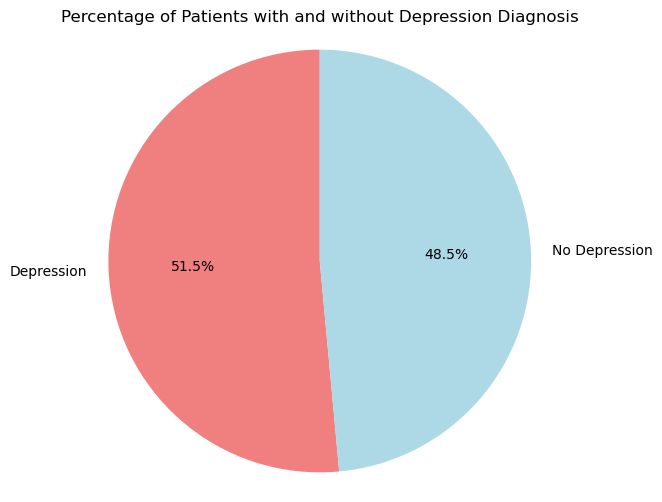

In [11]:
# Total number of patients
total_patients = df_p.shape[0]

# Number of patients with a depression diagnosis
depression_count = df_p[df_p['Depression Diagnosis'] == True].shape[0]

# Calculate the percentage
depression_percentage = (depression_count / total_patients) * 100

print(f"Percentage of patients with a depression diagnosis: {depression_percentage:.2f}%")

# Values for the pie chart
values = [depression_count, total_patients - depression_count]
labels = ['Depression', 'No Depression']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Percentage of Patients with and without Depression Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

#### `Question 2:` Which age group of OCD patients has the highest rate of depression diagnosis? (-> most at risk of developing depression)

/var/folders/5d/xg_32qv16px5zyhnhy6f319m0000gn/T/ipykernel_88666/993518843.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_depression = df_p.groupby('age_group')['Depression Diagnosis'].mean() * 100
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


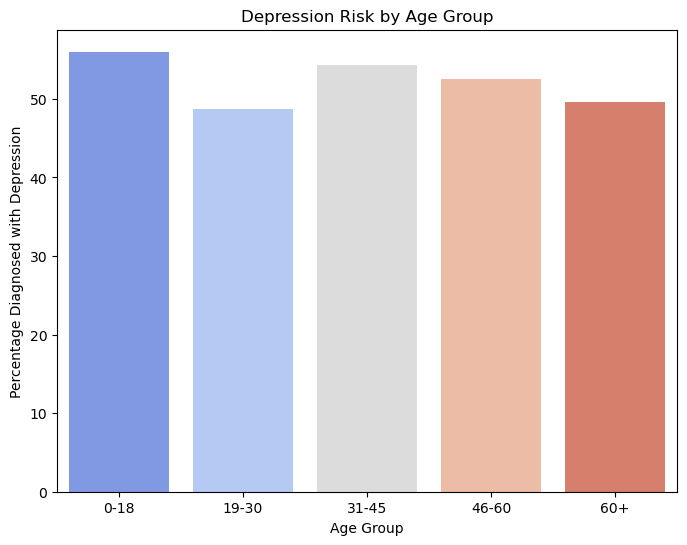

In [12]:
# Create age bins to group patients by age
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df_p['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate the percentage of patients with depression
age_depression = df_p.groupby('age_group')['Depression Diagnosis'].mean() * 100

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')
plt.title('Depression Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Diagnosed with Depression')
plt.show()

#### `Question 3:` What is the prevalence of depression diagnosis among men and women? 

Percentage of men with a depression diagnosis: 50.87%
Percentage of women with a depression diagnosis: 52.06%


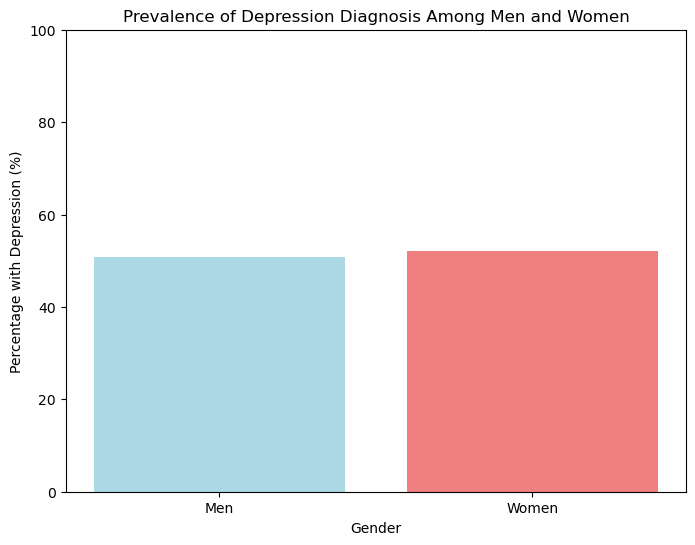

In [13]:
# Total number of male and female patients
total_men = df_p[df_p['Gender'] == True].shape[0]
total_women = df_p[df_p['Gender'] == False].shape[0]

# Number of men and women with a depression diagnosis
men_with_depression = df_p[(df_p['Gender'] == True) & (df_p['Depression Diagnosis'] == True)].shape[0]
women_with_depression = df_p[(df_p['Gender'] == False) & (df_p['Depression Diagnosis'] == True)].shape[0]

# Calculate the percentage of men and women with a depression diagnosis
men_depression_percentage = (men_with_depression / total_men) * 100 if total_men != 0 else 0
women_depression_percentage = (women_with_depression / total_women) * 100 if total_women != 0 else 0

# Print the results
print(f"Percentage of men with a depression diagnosis: {men_depression_percentage:.2f}%")
print(f"Percentage of women with a depression diagnosis: {women_depression_percentage:.2f}%")

# Bar chart for visualizing the prevalence of depression in men and women
gender_labels = ['Men', 'Women']
depression_percentages = [men_depression_percentage, women_depression_percentage]

plt.figure(figsize=(8, 6))
plt.bar(gender_labels, depression_percentages, color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Depression (%)')
plt.title('Prevalence of Depression Diagnosis Among Men and Women')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

#### `Question 4:` Which types of compulsions are most associated with depression?

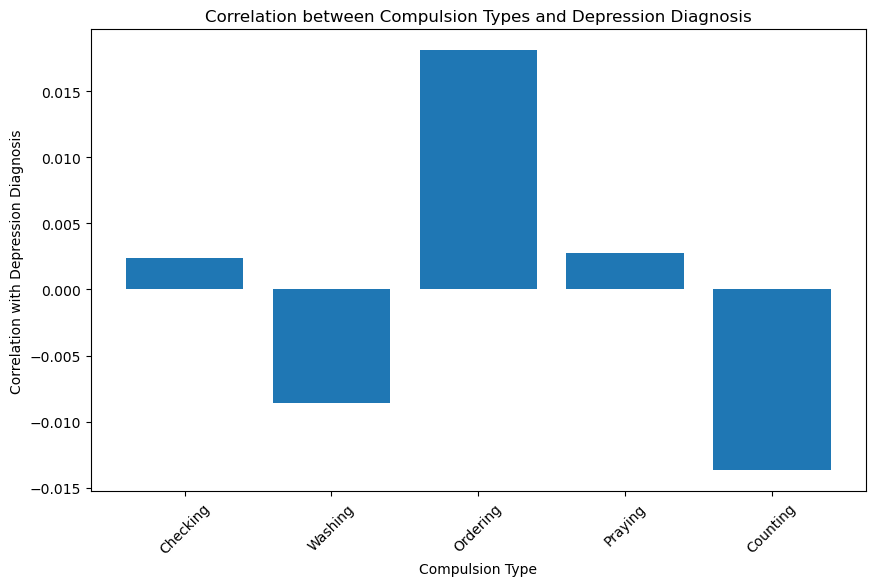

In [14]:
# Calculate the correlation between each compulsion type and Depression Diagnosis
correlations = df_p[['Compulsion_Type_Checking', 'Compulsion_Type_Washing', 'Compulsion_Type_Ordering',
                   'Compulsion_Type_Praying', 'Compulsion_Type_Counting', 'Depression Diagnosis']].corr()['Depression Diagnosis'][:-1]

# Graphic
plt.figure(figsize=(10, 6))
plt.bar(range(len(correlations)), correlations)
plt.xticks(range(len(correlations)), ['Checking', 'Washing', 'Ordering', 'Praying', 'Counting'], rotation=45)
plt.xlabel('Compulsion Type')
plt.ylabel('Correlation with Depression Diagnosis')
plt.title('Correlation between Compulsion Types and Depression Diagnosis')
plt.show()

#### `Question 5:` What medications are most prescribed to OCD patients with depression?

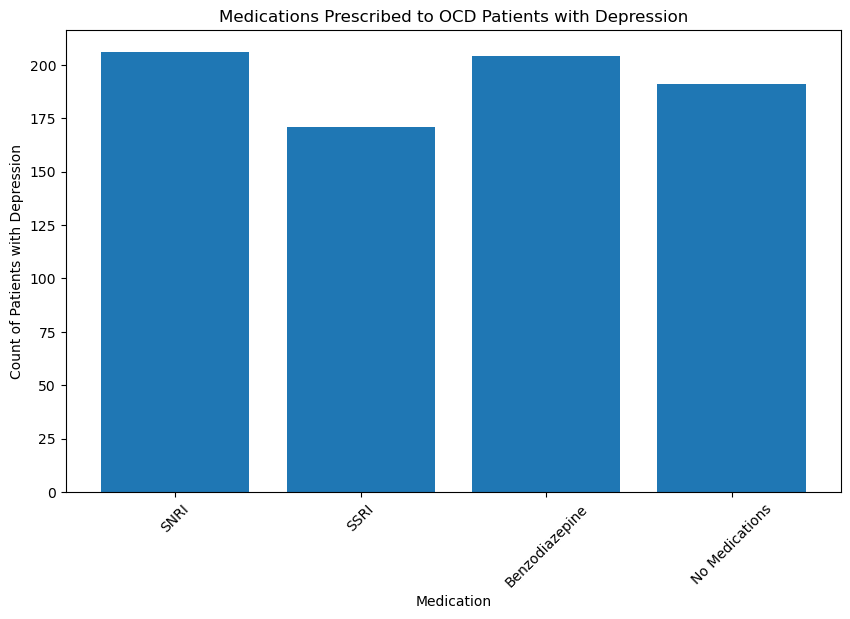

In [15]:
# Filter the data to only include OCD patients with depression
depressed_patients = df_p[df_p['Depression Diagnosis'] == 1]

# Calculate the count of patients prescribed each medication
medication_counts = depressed_patients[['Medications_SNRI', 'Medications_SSRI', 'Medications_Benzodiazepine', 'Medications_No Medications']].sum()

# Graphic
plt.figure(figsize=(10, 6))
plt.bar(range(len(medication_counts)), medication_counts)
plt.xticks(range(len(medication_counts)), ['SNRI', 'SSRI', 'Benzodiazepine', 'No Medications'], rotation=45)
plt.xlabel('Medication')
plt.ylabel('Count of Patients with Depression')
plt.title('Medications Prescribed to OCD Patients with Depression')
plt.show()

#### `Question 6:` How many OCD patients have a family history of OCD?

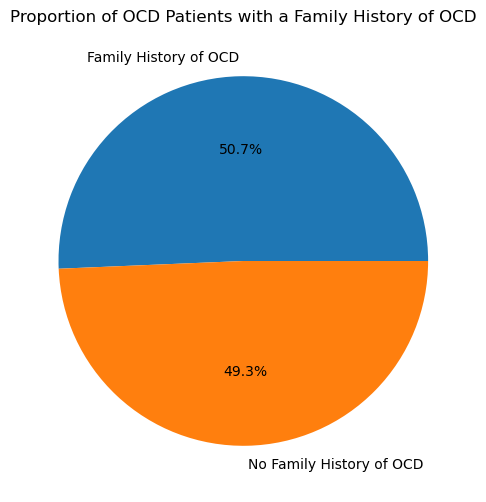

In [16]:
#Calculate the proportion of patients with and without a family history of OCD
family_history_proportions = [df_p['Family History of OCD'].value_counts()[1], df_p['Family History of OCD'].value_counts()[0]]

# graphic
plt.figure(figsize=(8, 6))
plt.pie(family_history_proportions, labels=['Family History of OCD', 'No Family History of OCD'], autopct='%1.1f%%')
plt.title('Proportion of OCD Patients with a Family History of OCD')
plt.show()

---

### Tab 2: Diagnostic Analytics

#### `Question 1:` Is there a significant correlation between the severity of OCD (Y-BOCS scores) and the likelihood of depression?

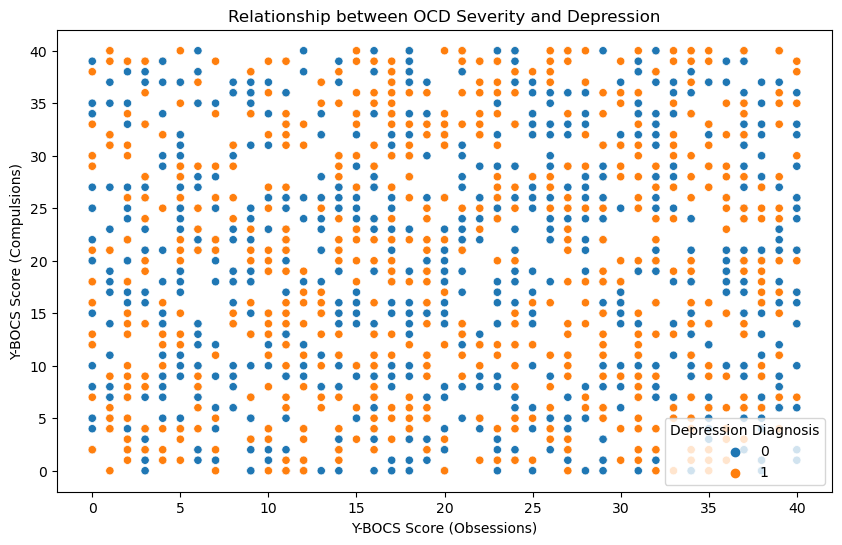

Correlation between Y-BOCS Score (Obsessions) and Depression: SignificanceResult(statistic=-0.00034487654883073795, pvalue=0.9893518472176732)
Correlation between Y-BOCS Score (Compulsions) and Depression: SignificanceResult(statistic=-0.0012764987211878543, pvalue=0.9606026093882784)


In [17]:
# Create a temporary DataFrame
df_temp = df.copy()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Depression Diagnosis', data=df_temp)
plt.title('Relationship between OCD Severity and Depression')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

# Calculate the point biserial correlation coefficient
correlation_obsessions = pointbiserialr(df_temp['Y-BOCS Score (Obsessions)'], df_temp['Depression Diagnosis'])
correlation_compulsions = pointbiserialr(df_temp['Y-BOCS Score (Compulsions)'], df_temp['Depression Diagnosis'])

print(f'Correlation between Y-BOCS Score (Obsessions) and Depression: {correlation_obsessions}')
print(f'Correlation between Y-BOCS Score (Compulsions) and Depression: {correlation_compulsions}')

NO, The correlation between Y-BOCS Score (Obsessions) and Depression is very weak (close to zero) and not statistically significant (p-value = 0.989). This suggests that there is no strong relationship between the severity of obsessive symptoms and the likelihood of depression.
The correlation between Y-BOCS Score (Compulsions) and Depression is also very weak (close to zero) and not statistically significant (p-value = 0.961). This suggests that there is no strong relationship between the severity of compulsive symptoms and the likelihood of depression.

---

#### `Question 2:` Is there a relationship between a patient’s demographic factors (age,gender, ethnicity) and the likelihood of depression in OCD patients? 


/var/folders/5d/xg_32qv16px5zyhnhy6f319m0000gn/T/ipykernel_88666/421137751.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_temp.groupby(['Gender', 'age_group','Depression Diagnosis']).size().unstack()


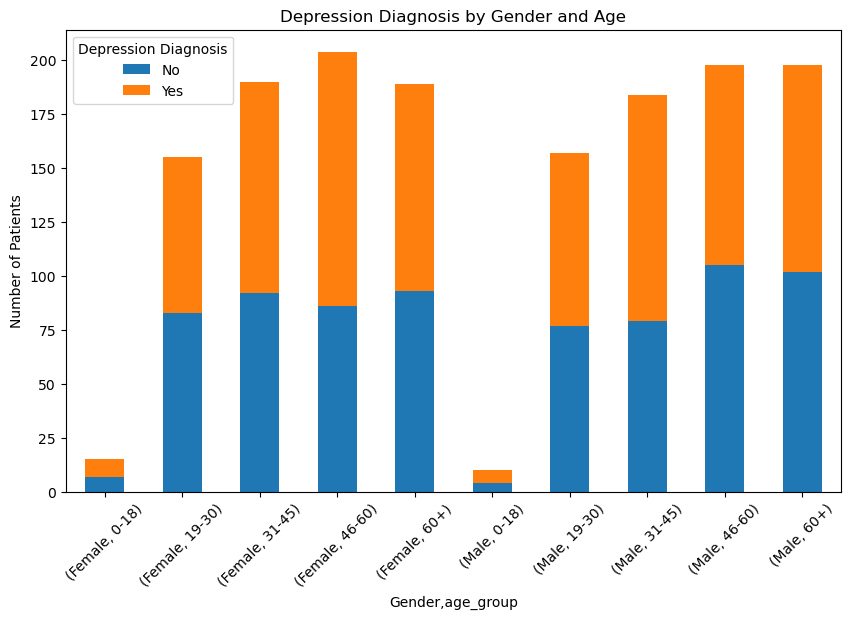

In [18]:
df_temp=df
df_temp['Gender'] = df['Gender'].replace({1: 'Male', 0: 'Female'})
df_temp['Depression Diagnosis'] = df['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'})

df_grouped = df_temp.groupby(['Gender', 'age_group','Depression Diagnosis']).size().unstack()

# Plot stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Depression Diagnosis by Gender and Age')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


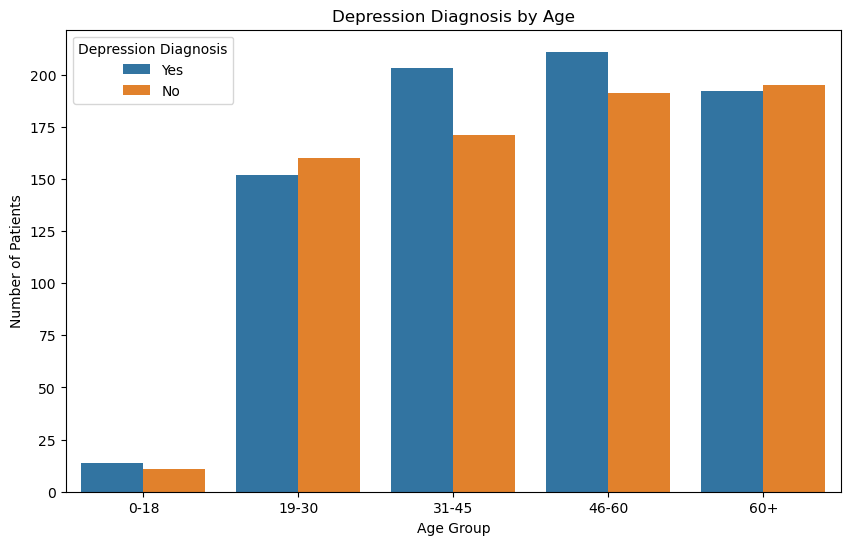

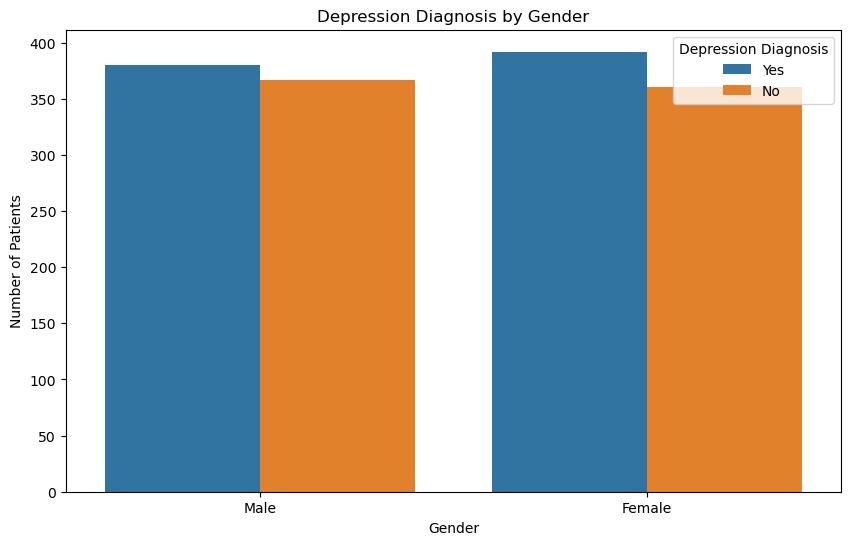

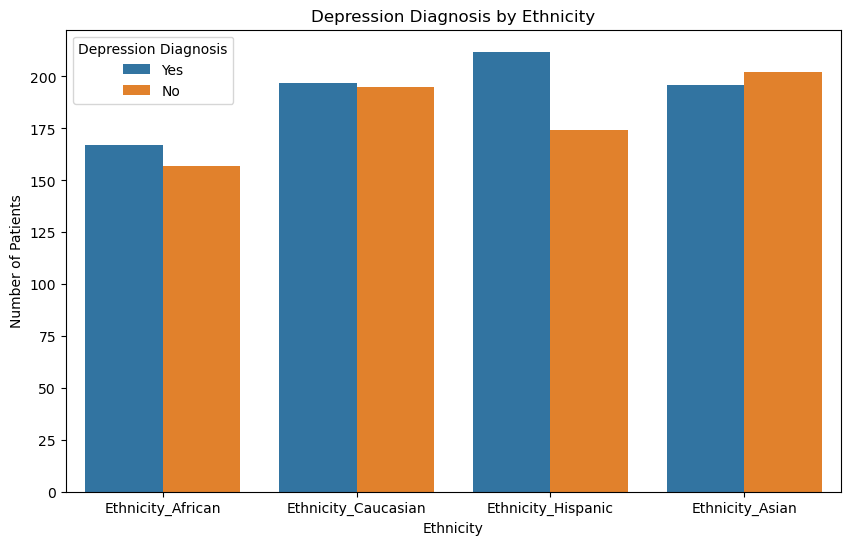

In [19]:

# Create a temporary DataFrame
df_temp = df.copy()

# Replace categorical values
df_temp['Gender'] = df['Gender'].replace({1: 'Male', 0: 'Female'})
df_temp['Depression Diagnosis'] = df['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'})

# Create a new column Ethnicity
df_temp['Ethnicity'] = df_temp[['Ethnicity_African', 'Ethnicity_Hispanic', 'Ethnicity_Asian', 'Ethnicity_Caucasian']].idxmax(axis=1)

# Plot the bar chart for Age
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='Depression Diagnosis', data=df_temp)
plt.title('Depression Diagnosis by Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age Group')
plt.show()

# Plot the bar chart for Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Depression Diagnosis', data=df_temp)
plt.title('Depression Diagnosis by Gender')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()

# Plot the bar chart for Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Depression Diagnosis', data=df_temp)
plt.title('Depression Diagnosis by Ethnicity')
plt.ylabel('Number of Patients')
plt.xlabel('Ethnicity')
plt.show()

### Tab 3: Predictive Analytics

Input features: `has to be checked!!`
- `age`
- `gender`
- `ethnicity`
- `martial status`
- `education level`
- `duration of symptoms`
- `previous diagnosis`
- `family history of OCD`
- `obsession type`
- `compulsion type`
- `Y-BOCS score obsession`
- `Y-BOCS score compulsion`
- `anxiety diagnosis`
- `medications`

Binary target class
- `Depression Diagnosis`

In [20]:
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)